# Análise de Teste A/B em Campanha de Marketing Digital

Testes  A/B  são  uma  metodologia  usada  para  comparar  duas  versões  de  uma  variável (como uma página da web, um aplicativo ou uma campanha publicitária) para determinar qual delas apresenta um desempenho melhor em termos de uma métrica definida.

Basicamente, o público é dividido aleatoriamente em dois grupos: o grupo A(controle)recebe a versão original e o grupo B(tratamento)recebe a versão modificada. O desempenho de cada grupo é então medido e comparado para ver qual versão é mais eficaz. Esse tipo de teste é muito útil para tomar decisões baseadas em dados, permitindo que as empresas otimizem suas estratégias de marketing.


## Importar bibliotecas

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Carregar dados

In [4]:
df = pd.read_csv('/home/priscila/Downloads/1-Mat/dados/dataset_testeAB.csv')
df.head()

,id_usuario,timestamp,grupo,pagina,converteu
0,847721,2024-01-17 14:01:00.090575,tratamento,pagina_com_cta,0
1,888545,2024-01-08 06:37:26.332945,controle,pagina_sem_cta,1
2,851104,2024-01-21 22:11:48.556739,tratamento,pagina_com_cta,0
3,804228,2024-01-12 08:01:45.159739,tratamento,pagina_com_cta,0
4,892356,2024-01-05 09:35:14.904865,controle,pagina_sem_cta,1


## Análise Exploratória

In [6]:
df.isnull().sum()

id_usuario    0
timestamp     0
grupo         0
pagina        0
converteu     0
dtype: int64

In [7]:
df['grupo'].value_counts()

grupo
controle      147270
tratamento    147190
Name: count, dtype: int64

É importante ter um equilibrio entre o número de observações em cada grupo.

In [11]:
pd.crosstab(df['grupo'], df['converteu'], margins=True)

converteu,0,1,All
grupo,,,
controle,129756,17514,147270
tratamento,129467,17723,147190
All,259223,35237,294460


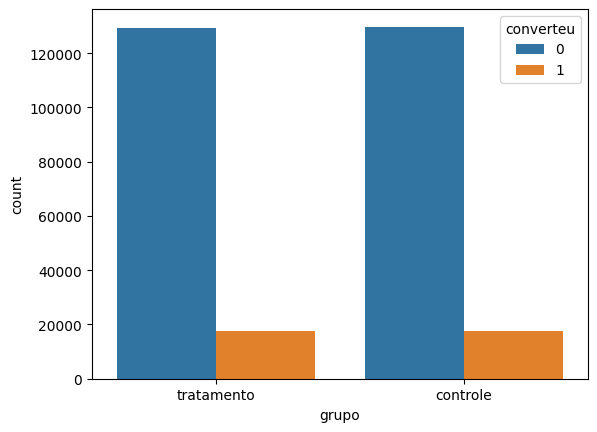

In [12]:
# Visualiza a distribuição de conversões nos grupos
sns.countplot(data = df, x = 'grupo', hue = 'converteu')
plt.show()

In [17]:
print(pd.crosstab(df['grupo'], df['pagina']))

pagina      pagina_com_cta  pagina_sem_cta
grupo                                     
controle              1965          145305
tratamento          145262            1928


A página sem cta é a página de controle e a página com é o grupo tratamento, há observações que estão no grupo errado, portanto serão removidas da análise. 

In [5]:
df2 = df[((df['grupo'] == 'controle') & (df['pagina'] == 'pagina_sem_cta')) |
         ((df['grupo'] == 'tratamento') & (df['pagina'] == 'pagina_com_cta'))]

df2.shape

(290567, 5)

In [43]:
taxa_conversao = df2.groupby('grupo')['converteu'].mean()
print(taxa_conversao)

grupo
controle      0.118812
tratamento    0.120396
Name: converteu, dtype: float64


## Analisando Teste A/B com Teste do Qui-Quadrado

O Teste do Qui-Quadrado (ou Chi-quadrado) é uma técnica estatística usada para determinar se há uma associação significativa entre duas variáveis categóricas. É amplamente utilizado em pesquisa para testar hipóteses sobre a independência de variáveis em tabelas de contingência (tabelas que mostram a distribuição de frequências de variáveis).

Existem vários tipos de Testes do Qui-Quadrado, mas os mais comuns são:

- Teste de Independência: Usado para avaliar se duas variáveis categóricas são independentes uma da outra. Por exemplo, pode-se usar esse teste para determinar se há uma relação entre gênero (masculino e feminino) e preferência por um produto (gosta ou não gosta).

- Teste de Adequação ao Modelo: Usado para ver se uma distribuição observada de dados se ajusta a uma distribuição teórica esperada. Por exemplo, ele pode ser usado para verificar se o número de acidentes em diferentes dias da semana se encaixa em uma distribuição uniforme.

Vamos realizar um Teste do Qui-Quadrado de independência usando uma tabela de contingência entre duas variáveis categóricas ('grupo' e 'converteu'). As hipóteses seriam formuladas da seguinte maneira:

**Hipótese Nula (H0)**: Não existe associação entre as variáveis 'grupo' e 'converteu'. Isso significa que o usuário pertencer a um grupo ou outro não afeta a probabilidade de conversão.

**Hipótese Alternativa (H1)**: Existe uma associação entre as variáveis 'grupo' e 'converteu'. Em outras palavras, o usuário pertencer a um grupo ou outro influencia a probabilidade de conversão.

Se o valor-p do teste for menor que o nível de significância estabelecido (geralmente 0,05), você rejeitaria a hipótese nula, concluindo que há evidências estatísticas suficientes para afirmar que existe uma associação entre pertencer a um grupo específico e a probabilidade de conversão. Se o valor-p for maior que 0.05, você não rejeitaria a hipótese nula, indicando que não há evidências suficientes para afirmar que há uma associação significativa.

In [44]:
from scipy.stats import chi2_contingency

In [45]:
# Cria tabela de contingência
tabela_contingencia = pd.crosstab(df2['grupo'], df2['converteu'])

print(tabela_contingencia)

converteu        0      1
grupo                    
controle    128041  17264
tratamento  127773  17489


In [47]:
# Teste de Qui-quadrado
chi2, p_value, _, _ = chi2_contingency(tabela_contingencia)

print(f'Chi-quadrado: {chi2}')
print(f'Valor-p: {p_value}')    

Chi-quadrado: 1.7161007736557263
Valor-p: 0.19019573569633683


As taxas de conversão são as seguintes:

- Grupo controle (página sem CTA): 11.88%
- Grupo tratamento (página com CTA): 12.04%

O resultado do teste qui-quadrado para comparar as taxas de conversão entre os dois grupos produziu um valor-p de aproximadamente 0.190. Isso indica que falhamos em rejeitar a H0 e que não há uma diferença estatisticamente significativa entre as taxas de conversão das duas páginas, dado que o valor-p é maior que o limiar comum de 0.05 para significância estatística.

Portanto, com base nos dados fornecidos e no teste realizado, parece que uso do CTA (Call-To-Action) não teve um impacto significativo na taxa de conversão dos usuários. 

## Analisando Teste A/B com Teste t de Student Para Amostras Independentes

O Teste t de Student para duas amostras independentes é um método estatístico usado para comparar as médias de duas amostras independentes para determinar se há uma diferença estatisticamente significativa entre elas. Este teste é amplamente utilizado em pesquisas que comparam dois grupos distintos, como tratamentos em estudos clínicos ou métodos educacionais em pesquisas acadêmicas.

Para aplicar o teste t de Student para duas amostras independentes, algumas suposições devem ser satisfeitas:

- Independência das Observações: As amostras devem ser coletadas de forma independente uma da outra.
- Normalidade: As distribuições das duas populações devem ser aproximadamente normais. Isso é menos preocupante com tamanhos de amostra grandes devido ao Teorema do Limite Central.
- Homogeneidade das Variâncias: As variâncias das duas populações devem ser iguais. Quando as variâncias não são iguais, variantes do teste t, como o teste de Welch, são usadas.

Hipóteses:

- Hipótese Nula (H0): As médias das duas populações são iguais. Ou seja, não há diferença significativa.
- Hipótese Alternativa (H1): As médias das duas populações são diferentes. Ou seja, há diferença significativa.

In [6]:
# Separa os grupos de controle e tratamento
grupo_controle = df2[df2['grupo'] == 'controle']
grupo_tratamento = df2[df2['grupo'] == 'tratamento']

In [8]:
# Calcule a média das taxas de conversão
taxa_controle = grupo_controle['converteu'].mean()
taxa_tratamento = grupo_tratamento['converteu'].mean()

print(f'Taxa de conversão - Controle: {taxa_controle}')
print(f'Taxa de conversão - Tratamento: {taxa_tratamento}')

Taxa de conversão - Controle: 0.11881215374556967
Taxa de conversão - Tratamento: 0.12039624953532238


In [10]:
# Teste de hipóteses
alfa = 0.05
hipotese_nula = "Não há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta."
hipotese_alternativa = "Há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta."

A função stats.ttest_ind() é uma função da biblioteca SciPy. Esta função realiza um Teste t de Student independente para duas amostras. O objetivo do Teste t é determinar se existe uma diferença estatisticamente significativa entre as médias de duas populações independentes.

A função stats.ttest_ind() recebe dois argumentos principais, que são as duas amostras (geralmente na forma de listas, arrays ou séries do pandas) para as quais você deseja testar a diferença entre as médias. A função retorna dois valores: a estatística t e o valor p.

A estatística t é um valor calculado que ajuda a determinar a diferença entre as médias das duas amostras em relação ao erro padrão combinado das amostras. Um valor t grande (positivo ou negativo) indica uma diferença maior entre as médias, enquanto um valor t próximo de zero indica que as médias são semelhantes.

O valor-p é uma medida de significância estatística. Ele indica a probabilidade de observar uma diferença igual ou maior do que a encontrada, assumindo que não há diferença real entre as médias das populações (ou seja, a hipótese nula é verdadeira). Um valor-p baixo (geralmente menor que 0,05) sugere que podemos rejeitar a hipótese nula e concluir que há uma diferença estatisticamente significativa entre as médias das duas populações.

In [11]:
# Aplica o teste
estatistica_t, p_valor = stats.ttest_ind(grupo_controle['converteu'], grupo_tratamento['converteu'])

In [12]:
print(f"Estatística t: {estatistica_t}")
print(f"Valor-p: {p_valor}")

Estatística t: -1.315716642446585
Valor-p: 0.1882702043077206


In [13]:
# Resultado
if p_valor < alfa:
    print(f"Rejeitamos a hipótese nula.\n{hipotese_alternativa}")
else:
    print(f"Falhamos em rejeitar a hipótese nula.\n{hipotese_nula}")

Falhamos em rejeitar a hipótese nula.
Não há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta.


In [14]:
# Import
from scipy.stats import shapiro

In [15]:
stat_A, p_A = shapiro(df2['converteu'])
print(f'Estatística de Shapiro-Wilk: {stat_A}, Valor-p: {p_A}')
if p_A > 0.05:
    print('A amostra A segue uma distribuição normal.')
else:
    print('A amostra A não segue uma distribuição normal.')

Estatística de Shapiro-Wilk: 0.37825713299264285, Valor-p: 1.5108023462326112e-195
A amostra A não segue uma distribuição normal.


In [16]:
stat_B, p_B = shapiro(df2['converteu'])
print(f'Estatística de Shapiro-Wilk: {stat_B}, Valor-p: {p_B}')
if p_B > 0.05:
    print('A amostra B segue uma distribuição normal.')
else:   
    print('A amostra B não segue uma distribuição normal.') 

Estatística de Shapiro-Wilk: 0.37825713299264285, Valor-p: 1.5108023462326112e-195
A amostra B não segue uma distribuição normal.


As amostras não passaram na validação de normalidade, portanto os resultados do teste-t não são confiáveis.

## Teste de Mann-Whitney U

O Teste de Mann-Whitney U é um teste estatístico não paramétrico utilizado para comparar as medianas de duas amostras independentes. É especialmente útil quando as premissas de normalidade dos dados não são atendidas, o que é comum em muitas situações práticas. O teste é uma alternativa ao teste t de Student para amostras independentes quando os dados não são normalmente distribuídos.

O Teste de Mann-Whitney U é adequado para testar a hipótese de que duas amostras provêm de distribuições com a mesma mediana. Ele é particularmente útil em estudos médicos, pesquisas sociais e outros campos onde as premissas de normalidade muitas vezes falham. Se o valor-p é pequeno (geralmente abaixo de 0,05), rejeita-se a hipótese nula, sugerindo uma diferença estatisticamente significativa entre as medianas dos grupos.

**Hipótese Nula (H0):**

A hipótese nula afirma que as medianas das duas distribuições são iguais. Em outras palavras, não há diferença significativa na mediana entre o grupo de controle e o grupo de tratamento. 

**Hipótese Alternativa (H1):**

A hipótese alternativa, no caso de um teste bicaudal (two-sided), afirma que as medianas das duas distribuições são diferentes. Isso não especifica qual grupo tem a mediana maior, apenas que uma diferença existe. 

In [17]:
# Import
from scipy.stats import mannwhitneyu

In [18]:
# Teste de hipóteses
alfa = 0.05
hipotese_nula = "Não há diferença significativa na mediana entre o grupo de controle e o grupo de tratamento."
hipotese_alternativa = "Há diferença significativa na mediana entre o grupo de controle e o grupo de tratamento."

In [20]:
# Aplica o teste de Mann-Whitney
estatistica_u, valor_p = mannwhitneyu(grupo_controle['converteu'], 
                                      grupo_tratamento['converteu'], 
                                      alternative = 'two-sided')

print(f"Estatística t: {estatistica_u}")
print(f"Valor-p: {valor_p}")

Estatística t: 10536929466.5
Valor-p: 0.1882697352188082


In [21]:
print(f"Estatística t: {estatistica_u}")
print(f"Valor-p: {valor_p}")

Estatística t: 10536929466.5
Valor-p: 0.1882697352188082


In [22]:
# Resultado
if p_valor < alfa:
    print(f"Rejeitamos a hipótese nula.\n{hipotese_alternativa}")
else:
    print(f"Falhamos em rejeitar a hipótese nula.\n{hipotese_nula}")

Falhamos em rejeitar a hipótese nula.
Não há diferença significativa na mediana entre o grupo de controle e o grupo de tratamento.


## Teste A/B com Regressão Logística

A regressão logística é um método estatístico utilizado para modelar a probabilidade de um evento ocorrer, com base na relação entre a variável dependente binária e uma ou mais variáveis independentes. Especificamente, ela é usada quando a variável de resposta é categórica e pode assumir apenas dois valores (por exemplo, sim ou não, sucesso ou fracasso, convertido ou não convertido).

A regressão logística pode ser usada em modelagem estatística quando o objetivo é compreender a relação entre as variáveis (nosso caso neste projeto) e pode ser usada em Machine Learning quando o objetivo é construir um modelo para prever a variável alvo.

In [23]:
# Import
from sklearn.linear_model import LogisticRegression

In [24]:
df2['pagina_cta_bin'] = df2['pagina'].apply(lambda x: 1 if x == 'pagina_com_cta' else 0)

y = df2['converteu']
X = df2[['pagina_cta_bin']]

In [ ]:
modelo = LogisticRegression()
modelo.fit(X, y)

coeficients = modelo.coef_[0][0]
odds_ratio = np.exp(coeficients)

In [27]:
print(f'Coeficiente: {coeficients}')
print(f'Odds Ratio: {odds_ratio}')

Coeficiente: 0.015575832009266646
Odds Ratio: 1.015697767540523


### Interpretação

A interpretação do coeficiente e do odds ratio no contexto de uma regressão logística envolve entender como a variável independente afeta a probabilidade do evento de interesse (neste caso, conversão).

Os coeficientes do modelo de regressão logística podem ser interpretados em termos de log-odds (logit ou coef) e odds ratios. 

Vamos entender como interpretar essas medidas:

**Log-odds (coeficientes)**:

Os coeficientes do modelo de regressão logística representam o efeito de uma unidade de mudança na variável independente (explicativa) sobre o log-odds da variável dependente (resposta). 

Um coeficiente positivo indica que, à medida que a variável independente aumenta, o log-odds da variável dependente também aumenta, tornando o evento mais provável. Por outro lado, um coeficiente negativo indica que, à medida que a variável independente aumenta, o log-odds da variável dependente diminui, tornando o evento menos provável.

**Odds ratios**:

As odds ratios são obtidas ao exponenciar os coeficientes do modelo de regressão logística. Uma odds ratio (OR) representa o fator de mudança nas odds da variável dependente em resposta a uma unidade de mudança na variável independente. Aqui estão algumas interpretações básicas para as odds ratios:

- OR = 1: A variável independente não tem efeito sobre a variável dependente.


- OR > 1: A variável independente tem um efeito positivo sobre a variável dependente. À medida que a variável independente aumenta, as odds da variável dependente também aumentam.


- OR < 1: A variável independente tem um efeito negativo sobre a variável dependente. À medida que a variável independente aumenta, as odds da variável dependente diminuem.

Logo...

O coeficiente na regressão logística, também conhecido como logit, representa a mudança no logaritmo das odds (chances) de o evento ocorrer (por exemplo, uma conversão) para cada unidade de aumento na variável independente, mantendo constantes todas as outras variáveis. Em nosso exemplo:

**Coeficiente = 0.015042010392362316**

Este valor indica que, para cada mudança unitária na variável pagina_cta_dummy (de 0 para 1, ou seja, mudando de uma página sem CTA para uma página com CTA), o logaritmo das odds de conversão aumenta em 0.015042. Em termos mais simples, isso sugere um efeito positivo, ainda que pequeno, da presença de um CTA na probabilidade de conversão.

O odds ratio é a exponenciação do coeficiente da regressão logística e oferece uma interpretação mais direta em termos de multiplicador de odds:

**Odds Ratio = 1.015155710809641**

Este valor significa que a presença de um CTA na página (comparada à ausência) multiplica as odds de conversão por aproximadamente 1.015. Isso indica que, quando um CTA está presente, as odds de conversão são 1.5% mais altas do que quando não está presente.

Interpretação Prática

Em nosso contexto, um odds ratio de 1.015 não representa uma mudança muito grande nas odds de conversão. No entanto, ainda é uma mudança positiva, indicando que a presença de um CTA tem um impacto ligeiramente positivo na probabilidade de conversão. É importante notar que a magnitude deste efeito pode ser considerada pequena e que devemos avaliar se essa mudança é estatisticamente significativa e relevante do ponto de vista prático para as decisões de negócios ou de design de página. Foi exatamente o que fizemos ao aplicar os testes estatísticos nas etapas anteriores deste projeto.

## Conclusão

- Fizemos a análise de um Teste A/B para um site de comércio eletrônico a fim de ajudar a decidir se a empresa deveria implementar uma nova página, manter a página antiga ou talvez executar o experimento por mais tempo.

- A partir do resultado da análise, descobrimos que a hipótese de a nova página obter maior taxa de conversão tem uma probabilidade muito baixa, portanto, acreditamos que permanecer com a página antiga é uma decisão mais adequada.

---